# Your Very First Machine Learning (ML) Model: Logistic Regression

Dataset: [College Student Placement Factors Dataset](https://www.kaggle.com/datasets/sahilislam007/college-student-placement-factors-dataset) (`data/college_student_placement_dataset.csv`)

In [38]:
# Import our libraries.

from IPython.display import display

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm

## Constants

It is a good programming practice to use constants to avoid repetition errors and to save yourself the effort of retyping the expression by _centralizing_ semantically identical values.

`DATASET_PATH` identifies the path to the dataset being loaded and operated on. `RANDOM_STATE` makes otherwise random operations reproducible run after run. Keep whatever value you set it to unless you want slightly different results.

In [40]:
DATASET_PATH = '../data/college_student_placement_dataset.csv'
RANDOM_STATE = 45

## Preliminary Inspection

See what the raw file looks like!

In [41]:
# Look at the first 5 lines of theraw contents of the file first.

with open(DATASET_PATH, 'r') as file:
    for line_number in range(5):
        if line := file.readline():
            print(line)
        else:
            break # Stop; there are less than 5 lines.


College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement

CLG0030,107,6.61,6.28,8,No,8,8,4,No

CLG0061,97,5.52,5.37,8,No,7,8,0,No

CLG0036,109,5.36,5.83,9,No,3,1,1,No

CLG0055,122,5.47,5.75,6,Yes,1,6,1,No



## Preliminary Load

Load the data. This is not the final form of the data which will be used, but it’s a `DataFrame` for further inspection so we can decide what to do with it next.

In [42]:
# Load the dataset into a pandas dataframe.

df = pd.read_csv(DATASET_PATH)
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


## Null Values Check
Inspect which varibles may be good / not good for using as features based on null values. 


In [ ]:
# Identify which columns have null values.

df.isnull().sum()
# all columns
# College_ID is an identifier, not a meaningful feature

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

## Duplicate Rows Check
If so, remove the duplicates.

In [44]:
# Check to see if our data has any duplicate rows.

df.duplicated().sum()


0

Many clean… 😐

## Categorical Categories

What are the categories for the categorial-looking (i.e., non-numeric) columns?

In [45]:
print('College_ID', 'Internship_Experience', 'Placement')

College_ID Internship_Experience Placement


## Feature Engineering

Non-numeric columns containing `'Yes'` and `'No'` do not work with logistic regression. Binary categories can be converted an integral type (`int`) with a value of 0 or 1.

In [46]:

#df= pd.get_dummies(df, columns=['Internship_Experience', 'Placement'], drop_first=True)
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


❔ When should you use this versus using `pd.get_dummies`?

# Visualization with `sns.pairplot`

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Internship_Experience_Yes,Placement_Yes
0,CLG0030,107,6.61,6.28,8,8,8,4,False,False
1,CLG0061,97,5.52,5.37,8,7,8,0,False,False
2,CLG0036,109,5.36,5.83,9,3,1,1,False,False
3,CLG0055,122,5.47,5.75,6,1,6,1,True,False
4,CLG0004,96,7.91,7.69,7,8,10,2,False,False


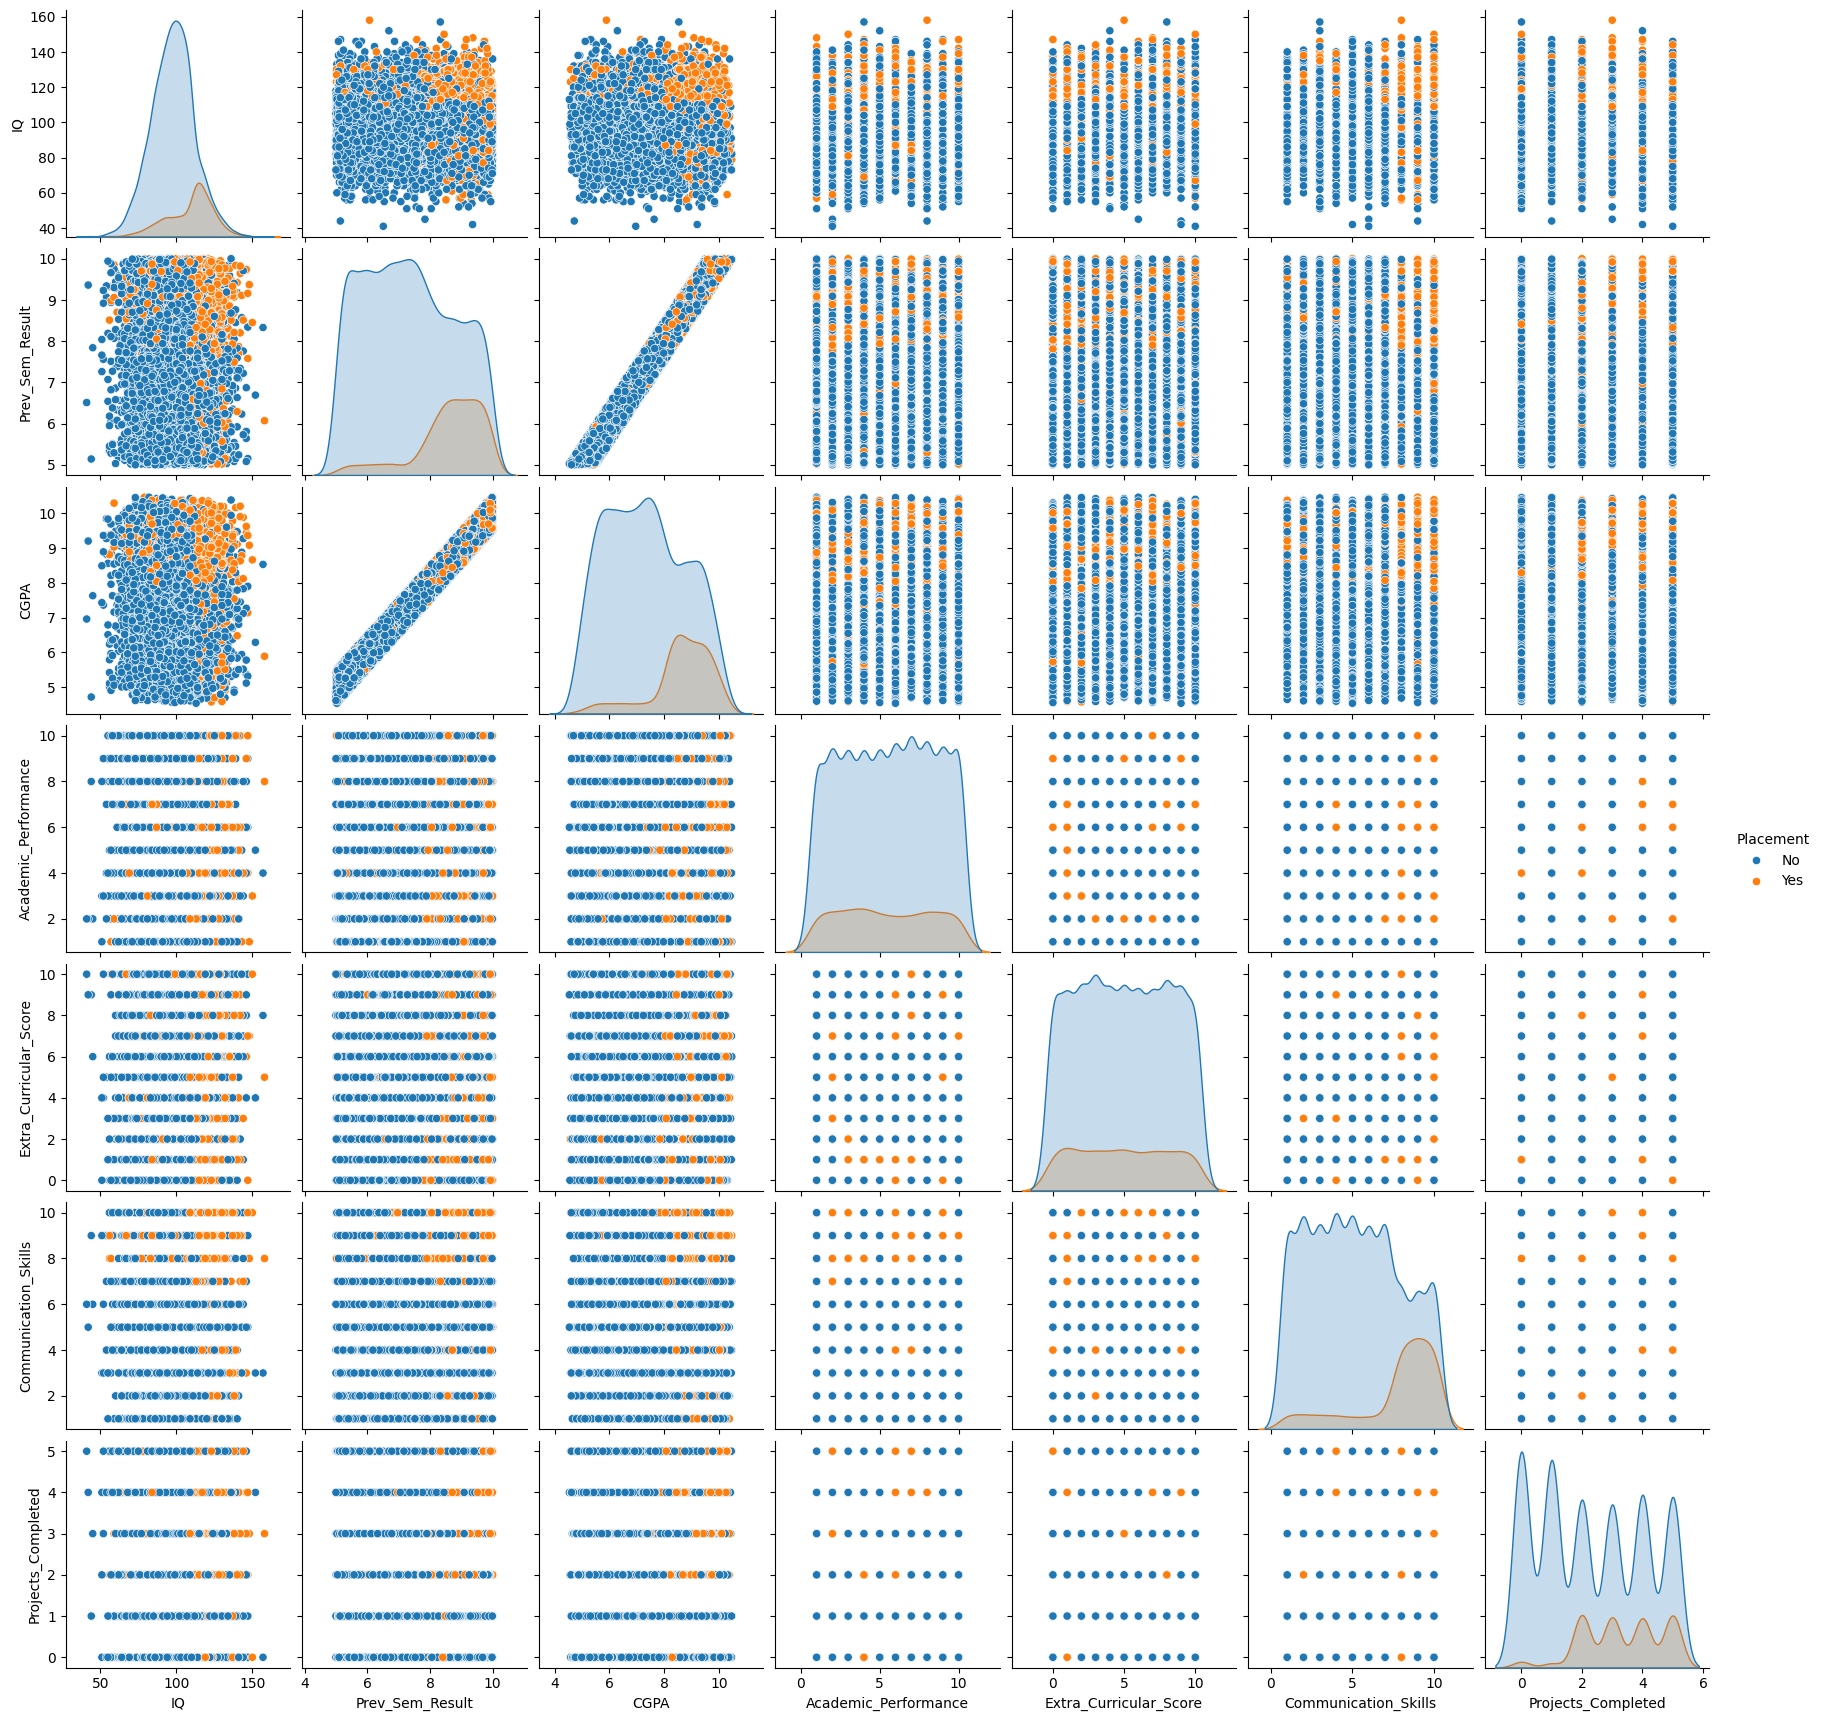

In [47]:
# Use sns.pariplot to visualize.

sns.pairplot(df, hue='Placement')
df= pd.get_dummies(df, columns=['Internship_Experience', 'Placement'], drop_first=True)
df.head()

## Feature Selection 

Choose the columns corresponding to the features _IQ_ and _internship experience_ to be your `X`. Target _placement_ as your `y`.

In [ ]:
# Set X to the desired features.
selected_features = ['IQ', 'Internship_Experience_Yes']

X = df[selected_features]

# Set y to be our target variable.
y = df['Placement_Yes']


## Split to Testing and Training Datasets 

In [49]:
# Split our data into testing and training pairs.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Print the length and width of our testing data.
print('X_train: %d rows, %d columns' % X_train.shape)
print('X_test: %d rows, %d columns' % X_test.shape)
print('y_train: %d rows, 1 column' % y_train.shape)
print('y_test: %d rows, 1 column' % y_test.shape)

X_train: 8000 rows, 2 columns
X_test: 2000 rows, 2 columns
y_train: 8000 rows, 1 column
y_test: 2000 rows, 1 column


## Build and train your model

Initialize an empty Logistic Regression model, and then fit your model to your training data. 

In [51]:
# Initalize our logistic regressionmodel.

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

print(type(model))


<class 'sklearn.linear_model._logistic.LogisticRegression'>


## Evaluation

Make predictions with your test data and save the predictions as `y_pred`.

In [ ]:
# 1. Make predictions of your test data and save them as `y_pred`.
model.fit(X=X_train, y=y_train)

y_pred = model.predict(X_test)
y_pred

array([False, False, False, ..., False, False, False])

Calculate and print the accuracy, precision, recall, and F1 scores of your model.

In [ ]:
# 2. Calculate and print the accuracy, precision, recall, and F1 scores of your model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy Score: %f" % accuracy)
print("Precision Score: %f" % precision)
print("Recall Score: %f" % recall)
print('F1 Score: %f' % f1)

Accuracy Score: 0.824000
Precision Score: 0.370370
Recall Score: 0.028986
F1 Score: 0.053763


Plot a confusion matrix of your predicted results.

Text(70.72222222222221, 0.5, 'Actual')

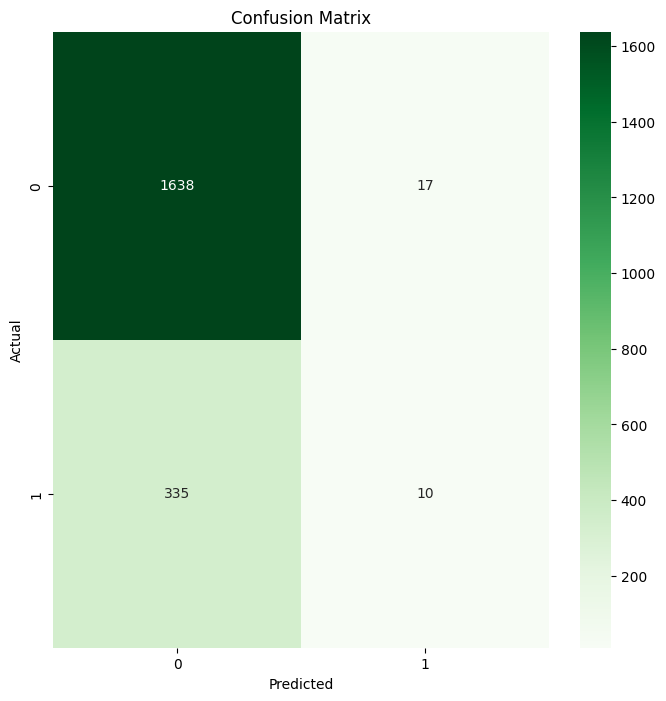

In [56]:
# 3. Plot a confusion matrix of your predicted results.

cm = confusion_matrix(y_test, y_pred)

# Just rounding them so the numbers are easier to read
cm = cm.round(2)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')

How many true positives and true negatives did your model get?

In [57]:
# How many true positives and true negatives did your model get?

true_negatives, false_positives, false_negatives, true_positives = tn, fp, fn, tp
print('True Negatives: %d' % true_negatives)
print('True Positives: %d' % true_positives)

True Negatives: 1638
True Positives: 10


Such awful 😞

# What is the Most Important Feature
 
Use `statsmodel` to create a summary report. Interpret the results.

In [ ]:
# Add a constant term to the independent variables.


# Fit the model.


# Print the summary and interpret the results.


# Extra Credit: Use your brain and make a better model (as in better scores).



In [ ]:
# Define the new X variable, and reuse the same y variable from before.


# Split our data into testing and training. Remember to use the same random state as you used before


# Initalize our model.


# Fit-train our model using our training data.


# Make new predicitions using our testing data.


# Print each of our scores to inspect performance.


# Plot the confusion matrix.
